# Comparison of different available functions

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

In [2]:
import numpy as np
np.set_printoptions(precision=3, threshold= sys.maxsize, suppress=False)
import mpmath
from zernipax.zernike import (
    zernike_radial_cpu,
    zernike_radial_gpu,
    zernike_radial_poly,
    zernike_radial_unique,
    zernike_radial_coeffs,
    polyder_vec,
)
from zernipax.basis import FourierZernikeBasis
from zernipax.plotting import plot_comparison
from zernipax.backend import jax

In [ ]:
res = 12
basis = FourierZernikeBasis(L=res, M=res, N=res)
r = np.linspace(0, 1, 1000)

In [4]:
dr = 0
jax.clear_caches()

_ = zernike_radial_cpu(r, basis.modes[:,0], basis.modes[:,1], dr)
_ = zernike_radial_gpu(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr)

%timeit zernike_radial_cpu(r, basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()
%timeit zernike_radial_gpu(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

10.9 ms ± 367 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
46.4 ms ± 664 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
print("zernike_radial_poly, 0th derivative")
%timeit _ = zernike_radial_poly(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr=0, exact=False)
print("zernike_radial_poly, 1st derivative")
%timeit _ = zernike_radial_poly(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr=1, exact=False)
print("zernike_radial_poly, 2nd derivative")
%timeit _ = zernike_radial_poly(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr=2, exact=False)
print("zernike_radial_poly, 3rd derivative")
%timeit _ = zernike_radial_poly(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr=3, exact=False)

zernike_radial_poly, 0th derivative
4.81 ms ± 273 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
zernike_radial_poly, 1st derivative
4.81 ms ± 133 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
zernike_radial_poly, 2nd derivative
4.6 ms ± 273 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
zernike_radial_poly, 3rd derivative
4.75 ms ± 115 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Exact computation
mpmath.mp.dps = 100
c = zernike_radial_coeffs(basis.modes[:, 0], basis.modes[:, 1], exact=True)
zt3 = np.array([np.asarray(mpmath.polyval(list(ci), r), dtype=float) for ci in polyder_vec(c, 3, exact=True)]).T
# CPU version
zr3 = zernike_radial_cpu(r, basis.modes[:, 0], basis.modes[:, 1], 3)
# GPU version
zd3 = zernike_radial_gpu(
    r[:, np.newaxis], basis.modes[:, 0], basis.modes[:, 1], 3
)

mpmath.mp.dps = 10
# Polynomial computation
zp3 = zernike_radial_poly(
    r[:, np.newaxis], basis.modes[:, 0], basis.modes[:, 1], dr=3, exact=False
)

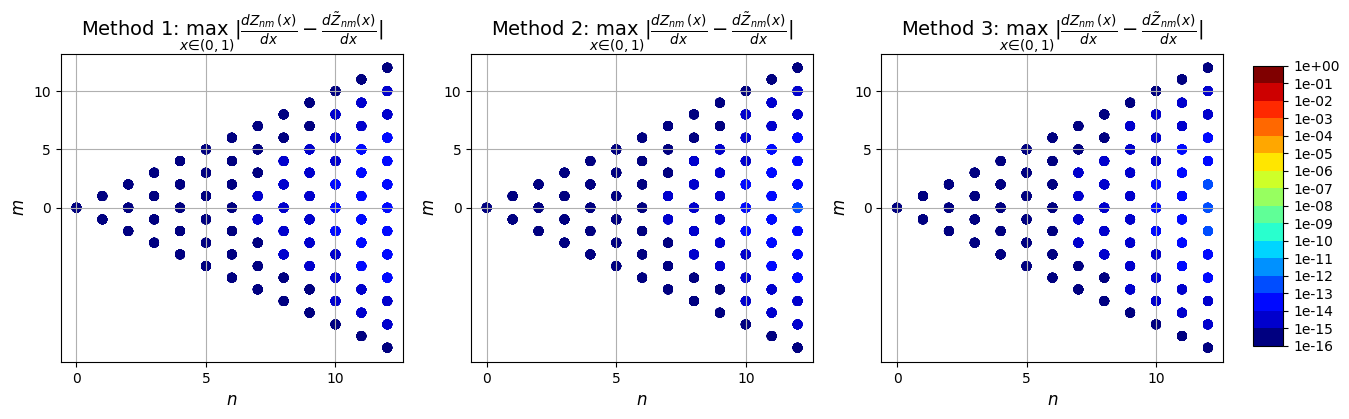

In [7]:
plot_comparison(zt3, (zr3, zd3, zp3), basis, 1, "absolute")

In [10]:
dr = 0
print(f"zernike_radial, derivative order: {dr}")

print("# With no duplicate modes (might have lacking modes)")
%timeit _ = zernike_radial_unique(r, basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

print("# With all the checks necessary")
%timeit _ = zernike_radial_cpu(r, basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

print("# With all the checks necessary but less efficient on CPU")
%timeit _ = zernike_radial_gpu(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

zernike_radial, derivative order: 0
# With no duplicate modes (might have lacking modes)
1.24 ms ± 308 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# With all the checks necessary
12.9 ms ± 274 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# With all the checks necessary but less efficient on CPU
44.6 ms ± 418 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
dr = 1
print(f"zernike_radial, derivative order: {dr}")

print("# With no duplicate modes (might have lacking modes)")
%timeit _ = zernike_radial_unique(r, basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

print("# With all the checks necessary")
%timeit _ = zernike_radial_cpu(r, basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

print("# With all the checks necessary but less efficient on CPU")
%timeit _ = zernike_radial_gpu(r[:,np.newaxis], basis.modes[:,0], basis.modes[:,1], dr).block_until_ready()

zernike_radial, derivative order: 1
# With no duplicate modes (might have lacking modes)
1.93 ms ± 6.67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# With all the checks necessary
13.2 ms ± 303 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# With all the checks necessary but less efficient on CPU
75.4 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
